In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

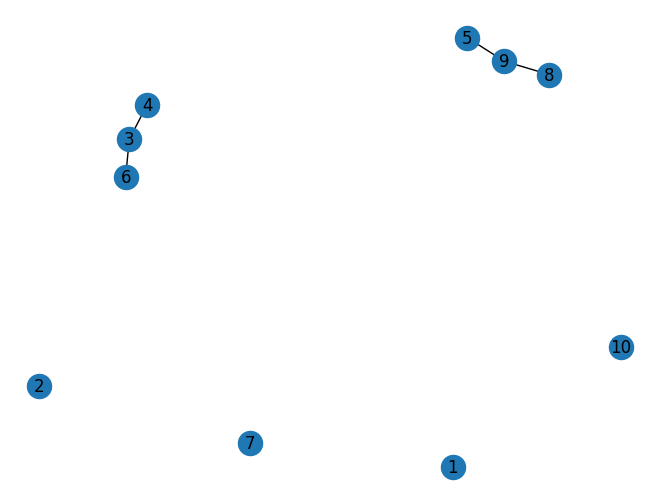

In [2]:
# Creating a graph with 10 nodes
g = nx.Graph()
g.add_nodes_from([i for i in range(1,11)])
for i in range(1,6):
    u = np.random.randint(1,11)
    v = np.random.randint(1,11)
    g.add_edge(u,v)
nx.draw(g,with_labels=True)
plt.show()

<AxesSubplot: >

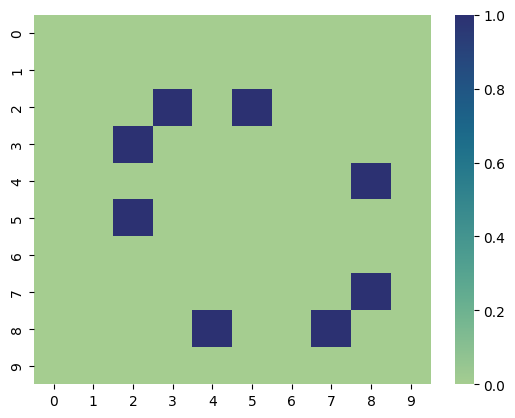

In [3]:
data = nx.adjacency_matrix(g)
data.todense()
sns.heatmap(data.todense(),cmap="crest")

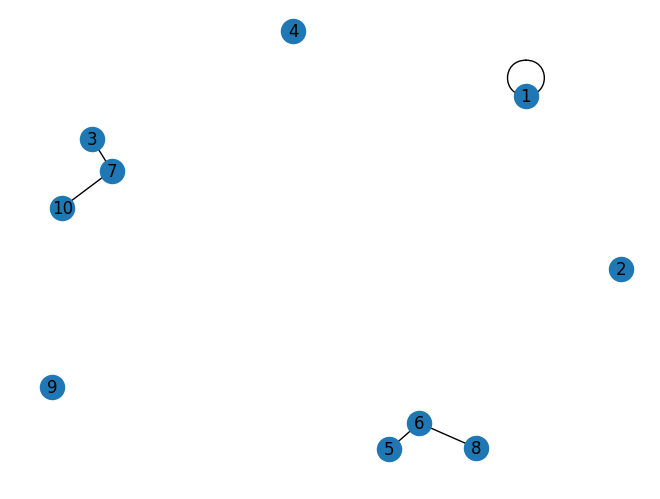

In [4]:
# Creating a graph with 10 nodes
g = nx.Graph()
g.add_nodes_from([i for i in range(1,11)])
for i in range(1,6):
    u = np.random.randint(1,11)
    v = np.random.randint(1,11)
    g.add_edge(u,v,weight=np.random.random())
nx.draw(g,with_labels=True)
plt.show()

<AxesSubplot: >

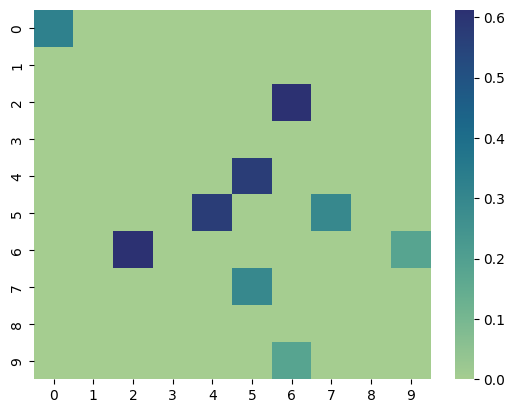

In [5]:
data = nx.adjacency_matrix(g)
data.todense()
sns.heatmap(data.todense(),cmap="crest")

In [6]:
data.todense()

array([[0.32403219, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61266491, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57252997, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.57252997,
        0.        , 0.        , 0.29547896, 0.        , 0.        ],
       [0.        , 0.        , 0.61266491, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18251183],
       [0.        , 0.        , 0.       

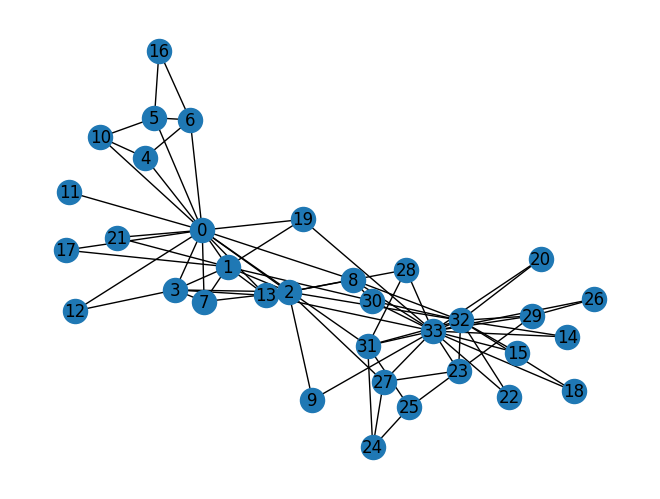

In [7]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True)
plt.show()

In [8]:
nx.adjacency_matrix(G).todense()

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]], dtype=int32)

Text(0.5, 0, 'Vertices')

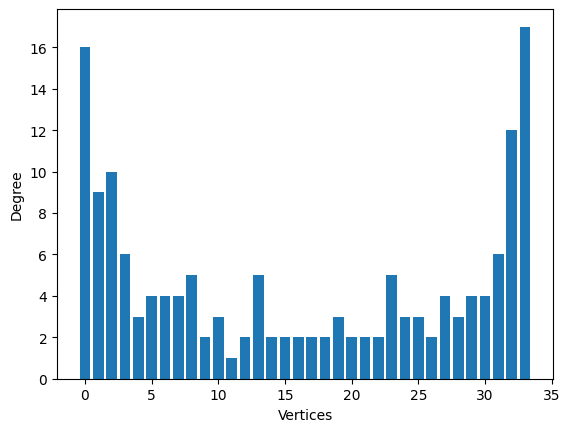

In [9]:
degree = dict(G.degree)
plt.bar(degree.keys(), degree.values())
plt.ylabel('Degree')
plt.xlabel('Vertices')

<AxesSubplot: ylabel='Count'>

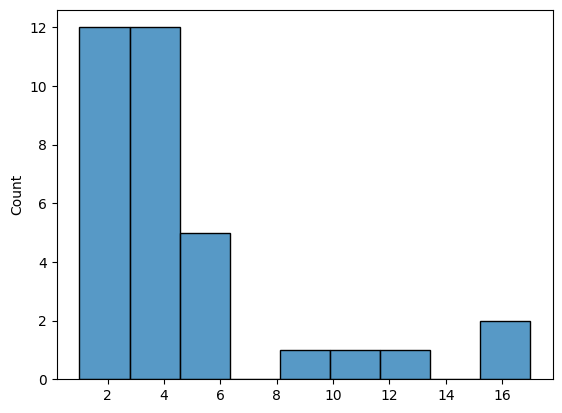

In [10]:
sns.histplot(degree)

In [11]:
def find_shortest_path(G,u,v):
    data = nx.adjacency_matrix(G)
    data = data.todense()
    distance_graph = [np.inf for i in range(data.shape[1])]
    distance_graph[u] = 0
    chosen_vertex = [u]
    complete = False
    current_vertex = u
    while(current_vertex!=v):
        for i in range(1,data.shape[0]):
            if(data[current_vertex][i]>0):
                if(distance_graph[current_vertex]+data[current_vertex][i]<distance_graph[i]):
                    distance_graph[i] = distance_graph[current_vertex]+data[current_vertex][i]
        #print(current_vertex)
        temp_data = list(distance_graph)
        temp_data = [distance_graph[i] for i in range(len(distance_graph)) if i not in chosen_vertex]
        print(temp_data)
        min_index = distance_graph.index(min(temp_data))
        current_vertex = min_index
        chosen_vertex.append(current_vertex)
        #print(min_index)
        #print(chosen_vertex)
    set_representation = [(chosen_vertex[i],chosen_vertex[i+1]) for i in range(len(chosen_vertex)-1) ]
    for i in set_representation:
        G[i[0]][i[1]]['color'] = 'r'
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    nx.draw(G,edge_color= colors,with_labels=True,arrows=True,arrowstyle='-|>')
    return chosen_vertex


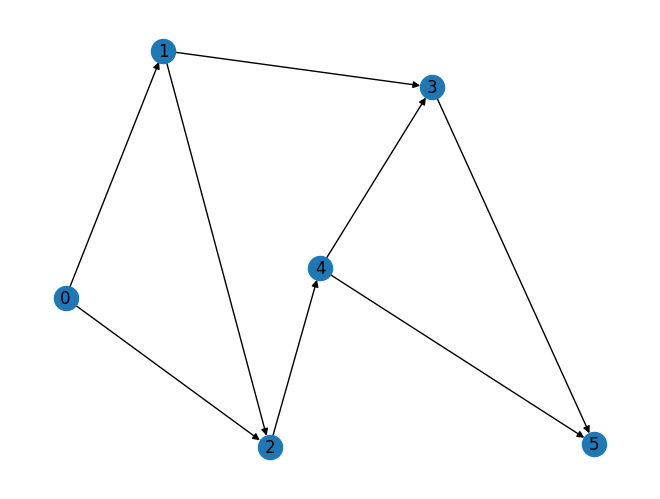

In [20]:
g = nx.DiGraph()
g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_edge(0,1,weight=2,color='b')
g.add_edge(0,2,weight=4,color='b')
g.add_edge(1,2,weight=1,color='b')
g.add_edge(1,3,weight=7,color='b')
g.add_edge(2,4,weight=3,color='b')
g.add_edge(3,5,weight=1,color='b')
g.add_edge(4,3,weight=2,color='b')
g.add_edge(4,5,weight=5,color='b')
#g = g.to_directed()
nx.draw(g,with_labels=True)
plt.show()


[2, 4, inf, inf, inf]
[3, 9, inf, inf]
[9, 6, inf]
[8, 11]
[9]


[0, 1, 2, 4, 3, 5]

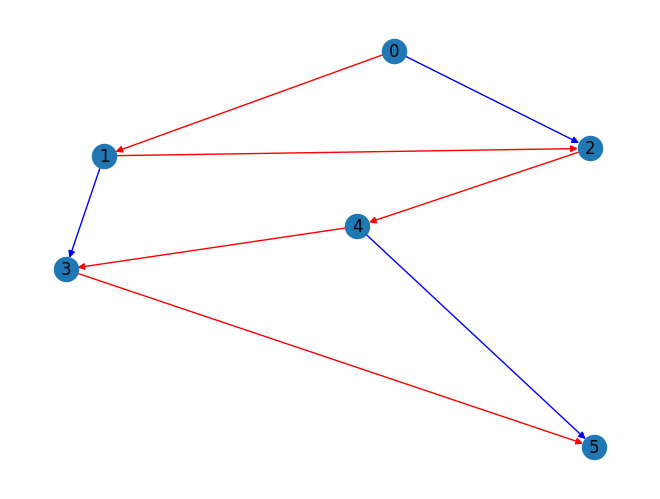

In [21]:
find_shortest_path(g,0,5)

In [14]:
chosen_vertex=[1,2,3,4]
set_representation = [(chosen_vertex[i],chosen_vertex[i+1]) for i in range(len(chosen_vertex)-1) ]
set_representation

[(1, 2), (2, 3), (3, 4)]